In [1]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from matplotlib import pyplot as plt

In [10]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_c.shape, t_u.shape

(torch.Size([11, 1]), torch.Size([11, 1]))

In [12]:
n_samples = t_c.numel()
n_val = int(0.2 * n_samples)

shuffele_indices = torch.randperm(n_samples)
train_indices = shuffele_indices[:-n_val]
val_indices = shuffele_indices[-n_val:]

train_indices, val_indices


(tensor([ 0, 10,  6,  8,  3,  2,  4,  7,  1]), tensor([9, 5]))

In [13]:
t_c_train = t_c[train_indices]
t_c_val = t_c[val_indices]

t_u_train = t_u[train_indices]
t_u_val = t_u[val_indices]

t_un_train = t_u_train * 0.1
t_un_val = t_u_val * 0.1

In [2]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [3]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [5]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [22]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):

    for epoch in range(1, n_epochs + 1):
        
        optimizer.zero_grad()
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        loss_train.backward()
        optimizer.step()
    
        if epoch % 1000 == 0:
            print(f'Epoch {epoch} Training loss {loss_train:.4f} Validation loss {loss_val:.4f}')

        

In [24]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)

Epoch 1000 Training loss 1.9570 Validation loss 5.4927
Epoch 2000 Training loss 1.6935 Validation loss 4.0568
Epoch 3000 Training loss 1.6361 Validation loss 3.3926
Epoch 4000 Training loss 1.6176 Validation loss 3.3935
Epoch 5000 Training loss 1.6023 Validation loss 3.4046


In [35]:
t_range = torch.range(20., 90.).unsqueeze(1)
t_range.shape

/tmp/ipykernel_49393/2382549664.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  t_range = torch.range(20., 90.).unsqueeze(1)


torch.Size([71, 1])

/tmp/ipykernel_49393/3176258369.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  t_range = torch.range(20., 90.).unsqueeze(1)


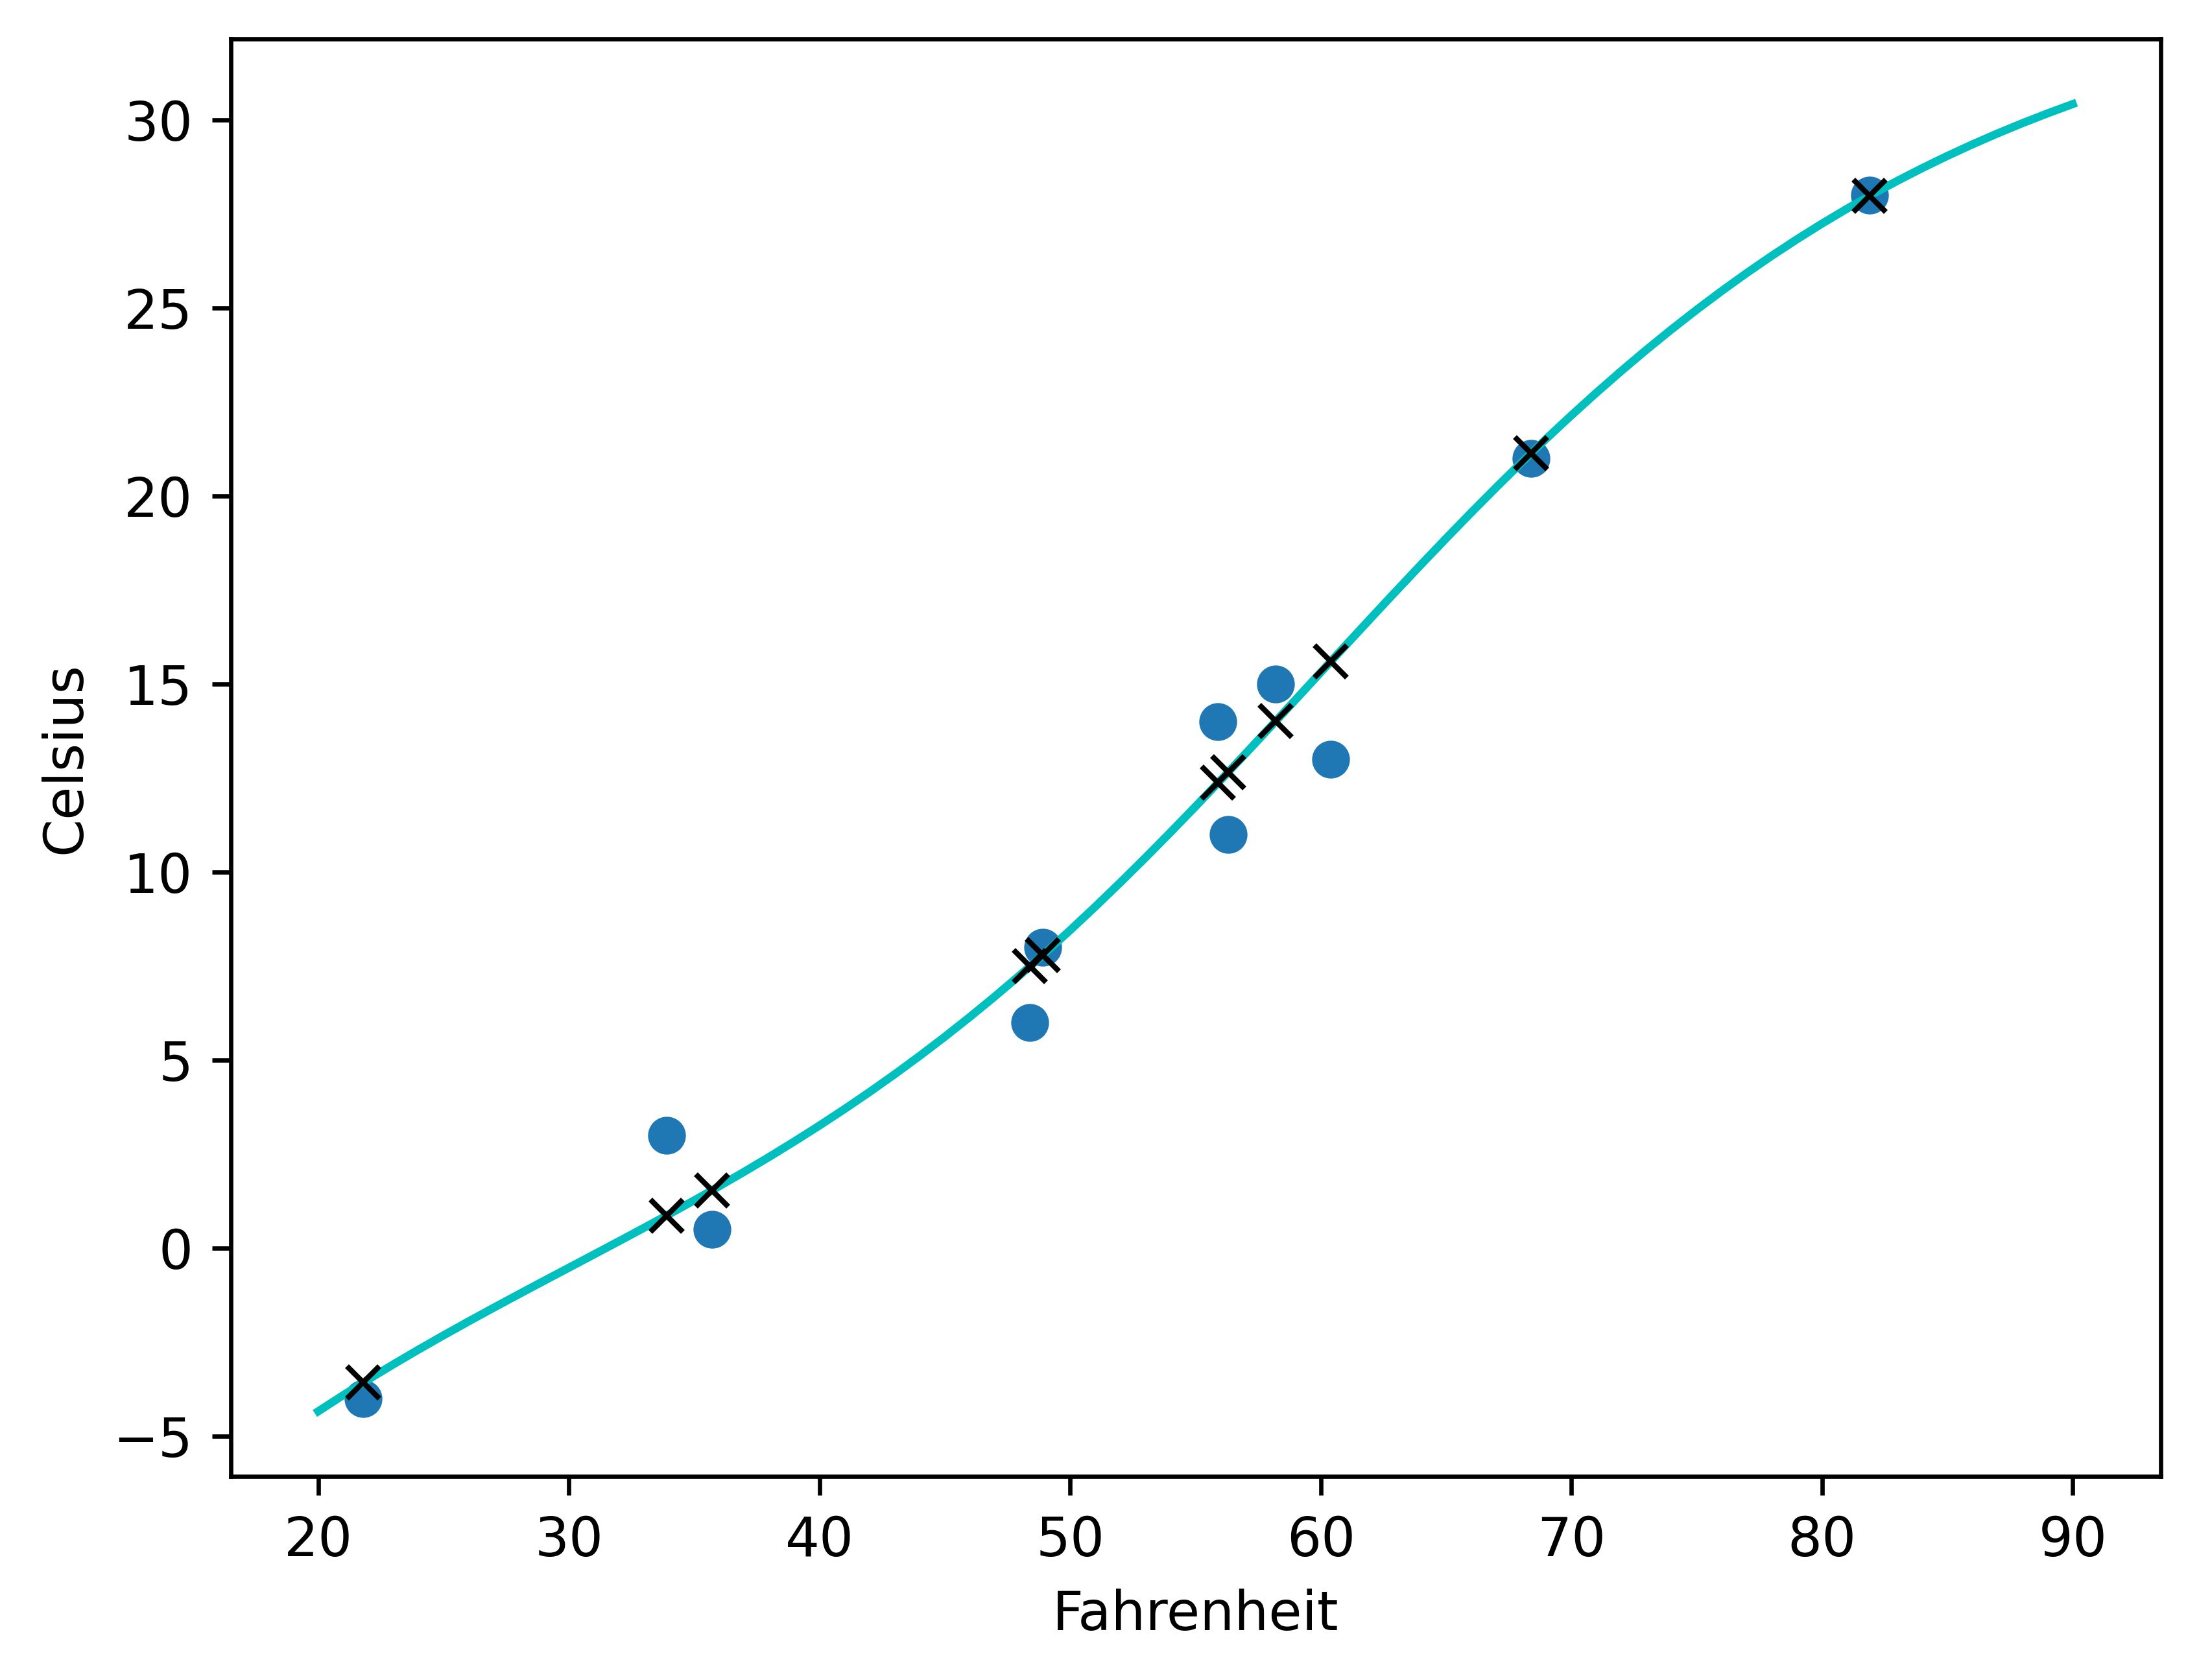

In [31]:
t_range = torch.range(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), "kx")